<a href="https://colab.research.google.com/github/rohanpuda/ml_Lab/blob/main/House_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vikrishnan_boston_house_prices_path = kagglehub.dataset_download('vikrishnan/boston-house-prices')

print('Data source import complete.')


Data source import complete.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [9]:
# Reload the CSV using whitespace as the delimiter and no header
df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, header=None)

# Now assign the 14 column names
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
           "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = columns

# Check the first few rows
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


<ipython-input-9-cd57957df61a>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, header=None)


In [10]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [11]:
print(df.head())
print(df.info())
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

In [12]:
# Define features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
"Linear Regression": LinearRegression(),
"Ridge (alpha=1.0)": Ridge(alpha=1.0),
"Lasso (alpha=0.1)": Lasso(alpha=0.1)
}

In [15]:
results = {
    "Model": [],
    "R²": [],
    "MSE": [],
    "RMSE": [],
    "MAE": []
}



 Linear Regression
R² Score: 0.6688
MSE: 24.2911
RMSE: 4.9286
MAE: 3.1891


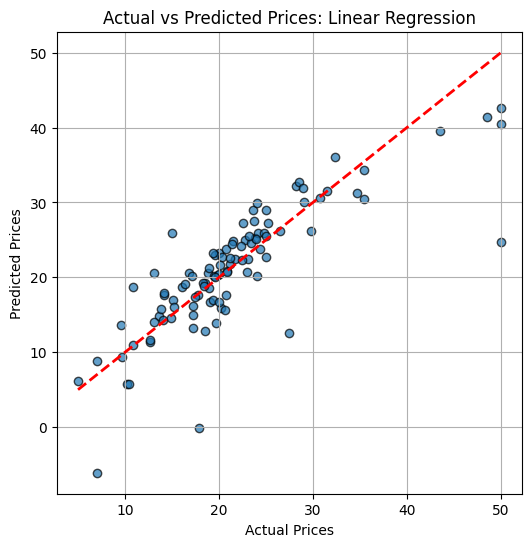


 Ridge (alpha=1.0)
R² Score: 0.6662
MSE: 24.4772
RMSE: 4.9474
MAE: 3.1329


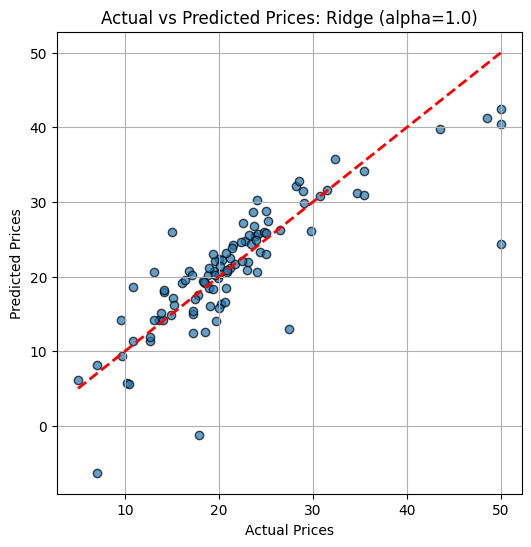


 Lasso (alpha=0.1)
R² Score: 0.6570
MSE: 25.1556
RMSE: 5.0155
MAE: 3.1452


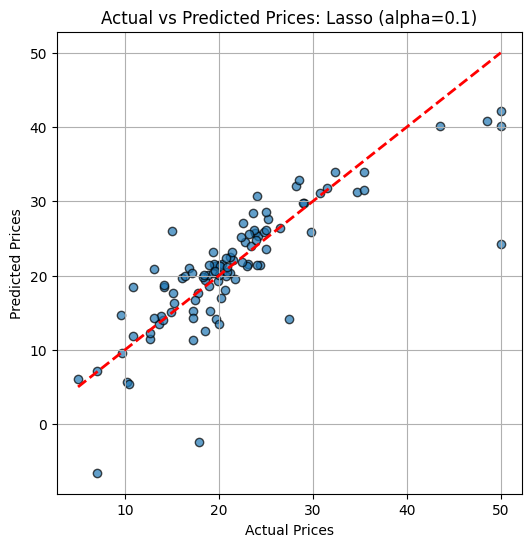

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    results["Model"].append(name)
    results["R²"].append(r2)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)


    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    y_test_np = np.array(y_test)
    plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices: {name}")
    plt.grid(True)
    plt.show()

In [17]:
results_df = pd.DataFrame(results)


<ipython-input-18-85a74ca41626>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(results_df["Model"], rotation=15)
<ipython-input-18-85a74ca41626>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(results_df["Model"], rotation=15)
<ipython-input-18-85a74ca41626>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(results_df["Model"], rotation=15)
<ipython-input-18-85a74ca41626>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(results_df["Model"], rotation=15)


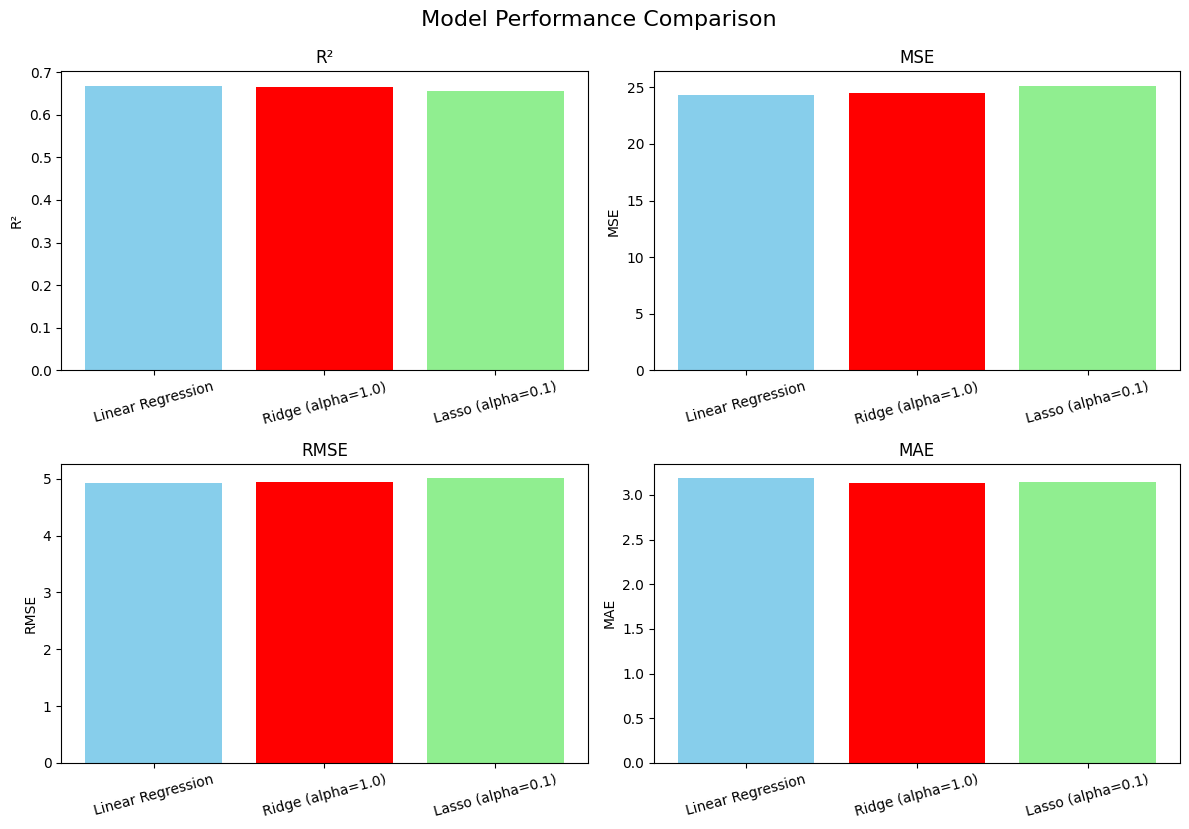

In [18]:
metrics = ["R²", "MSE", "RMSE", "MAE"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    axes[idx].bar(results_df["Model"], results_df[metric], color=["skyblue", "red", "lightgreen"])
    axes[idx].set_title(metric)
    axes[idx].set_ylabel(metric)
    axes[idx].set_xticklabels(results_df["Model"], rotation=15)
plt.tight_layout()
plt.suptitle(" Model Performance Comparison", fontsize=16, y=1.03)
plt.show()